In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 

os.chdir('/content/drive/Shareddrives/DSO 569')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
ls

'DSO 569 code.ipynb'
'processminer-rare-event-mts - data.csv'
'processminer-rare-event-mts - data.gsheet'


In [ ]:
events = pd.read_csv('processminer-rare-event-mts - data.csv')

In [ ]:
events

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,5/28/99 23:58,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,-0.773514,-0.752385,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242,0
18394,5/29/99 0:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,-0.773514,-0.752385,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235,0
18395,5/29/99 0:02,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,-0.773514,-0.752385,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228,0
18396,5/29/99 0:04,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,-0.773514,-0.752385,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221,0


# Data Cleaning

## Categorical variable cleaning

In [ ]:
x28 = events.loc[:,'x28']
x28

0        96
1        96
2        96
3        96
4        96
         ..
18393    96
18394    96
18395    96
18396    96
18397    96
Name: x28, Length: 18398, dtype: int64

In [ ]:
one_hot_encoded = pd.get_dummies(x28.values)

In [ ]:
one_hot_encoded

,51,82,84,93,96,112,118,139
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
18393,0,0,0,0,1,0,0,0
18394,0,0,0,0,1,0,0,0
18395,0,0,0,0,1,0,0,0
18396,0,0,0,0,1,0,0,0


In [ ]:
events_encoded = pd.concat([events, one_hot_encoded], axis=1)
events_encoded = events_encoded.drop('x28', axis=1)

In [ ]:
x61 = events_encoded.loc[:,'x61']
x61.value_counts()

0    18379
1       19
Name: x61, dtype: int64

In [ ]:
events_encoded.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x60,x61,51,82,84,93,96,112,118,139
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,0.006076,0,0,0,0,0,1,0,0,0
1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,0.006083,0,0,0,0,0,1,0,0,0
2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,0.006090,0,0,0,0,0,1,0,0,0
3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,0.006097,0,0,0,0,0,1,0,0,0
4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,0.006105,0,0,0,0,0,1,0,0,0


# Data Manipulation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X, y = events_encoded.iloc[:, 2:].values, events_encoded.iloc[:, 1].values
minmax = MinMaxScaler()
X_rescale = minmax.fit_transform(X)

In [ ]:
index_one = np.where(events_encoded['y']==1)

In [ ]:
index_one = [arr.tolist() for arr in index_one][0]
index_one

[259,
 776,
 835,
 1036,
 1263,
 1301,
 1339,
 1344,
 1719,
 1750,
 2121,
 2298,
 2303,
 2308,
 2312,
 2317,
 2335,
 2366,
 2374,
 2378,
 2407,
 2591,
 2599,
 2645,
 2714,
 2738,
 2826,
 2921,
 2945,
 2963,
 2971,
 2999,
 3522,
 3598,
 3600,
 3748,
 4018,
 4177,
 4797,
 4933,
 5457,
 6220,
 6823,
 7147,
 7173,
 7243,
 7609,
 7843,
 7939,
 7946,
 8022,
 8072,
 8083,
 8130,
 8221,
 8236,
 8475,
 8933,
 9101,
 9148,
 9153,
 9196,
 9203,
 9412,
 9431,
 9523,
 9842,
 10037,
 10163,
 10241,
 10798,
 10817,
 10837,
 10893,
 11152,
 11503,
 11551,
 11574,
 11743,
 11751,
 11792,
 11829,
 11867,
 12324,
 13081,
 13614,
 14029,
 14138,
 14160,
 14516,
 14914,
 15096,
 15294,
 15413,
 15436,
 15456,
 15483,
 15520,
 15526,
 15531,
 15567,
 15590,
 15644,
 15647,
 15663,
 15669,
 15705,
 15709,
 15739,
 15770,
 15806,
 15926,
 16259,
 16693,
 16923,
 17033,
 17182,
 17205,
 17293,
 17476,
 17605,
 17866,
 17893,
 18009]

In [ ]:
events.loc[776]

time    5/2/99 4:02
y                 1
x1        -0.782471
x2       -12.118747
x3       -16.855194
           ...     
x57        1.642284
x58        0.013798
x59        2.664362
x60        0.007856
x61               0
Name: 776, Length: 63, dtype: object

In [ ]:
start_index = max(0, index_one[1] - 5)  # calculate the start index of the desired rows
desired_rows = events_encoded.iloc[start_index:index_one[1] + 1]
# flattened_array = desired_rows.to_numpy().flatten()
# flattened_df = pd.DataFrame(flattened_array.reshape(1, -1))
# flattened = np.ravel(desired_rows)

# new_df = pd.DataFrame([flattened])
# new_df
desired_rows

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x60,x61,51,82,84,93,96,112,118,139
771,5/2/99 3:52,0,-0.783766,-4.815518,4.802241,-322.78161,-0.106455,20.957192,0.020874,-0.091023,...,0.007803,0,0,0,0,1,0,0,0,0
772,5/2/99 3:54,0,-0.750687,-4.797807,4.794085,-322.78161,-0.232920,21.944618,0.020874,-0.081257,...,0.007814,0,0,0,0,1,0,0,0,0
773,5/2/99 3:56,0,-0.686599,-4.627564,4.966667,-322.78161,-0.359400,22.932015,0.023967,-0.081257,...,0.007824,0,0,0,0,1,0,0,0,0
774,5/2/99 3:58,0,-0.738480,-4.604522,5.133959,-322.78161,-0.485865,23.919441,0.030640,-0.081257,...,0.007835,0,0,0,0,1,0,0,0,0
775,5/2/99 4:00,0,-0.706759,-6.442805,-0.920200,-322.78161,-0.612330,24.906838,0.040711,-0.071186,...,0.007845,0,0,0,0,1,0,0,0,0
776,5/2/99 4:02,1,-0.782471,-12.118747,-16.855194,-322.78161,-0.738810,25.966042,0.040711,-0.071186,...,0.007856,0,0,0,0,1,0,0,0,0


In [ ]:
flattened = pd.DataFrame(desired_rows.values.flatten(), 
                         index=[f"{i}_{col}" for i in range(len(desired_rows.index)) for col in desired_rows.columns])
reshape = flattened.T

In [ ]:
# create an empty DataFrame
df = pd.DataFrame()
events_copy = events_encoded.copy()
dropped_indices = []
# loop over the indices where value is 1
for i in index_one:
  start_index = max(0, i - 5)  # calculate the start index of the desired rows
  desired_rows = events_encoded.iloc[start_index:i + 1]
  df.append(desired_rows)
  dropped_indices += list(events_copy.index[start_index:i + 1])
events_copy = events_copy.drop(dropped_indices)

<ipython-input-19-96f64d079c3f>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(desired_rows)


In [ ]:
df.y.value_counts()

AttributeError: ignored

In [ ]:
events_copy.y.value_counts()

In [ ]:
# start_index = max(0, index_one[0] - 5)
# flatten_rows = df.loc[start_index:index_one[0]- 1]
# flattened = np.ravel(flatten_rows)
# flatten_df = pd.DataFrame([flattened])

# start_index = max(0, index_one[1] - 5)
# flatten_rows = df.loc[start_index:index_one[1]-1]
# flattened = np.ravel(flatten_rows)
# flatten_df = flatten_df.append([flattened])
# flatten_df

In [ ]:
flatten_df

In [ ]:
flatten_df = pd.DataFrame()
for i in index_one:
  start_index = max(0, i - 5)
  print(i)
  flatten_rows = df.loc[start_index:i-1]
  flattened = np.ravel(flatten_rows)
  flatten_df.append([flattened])#.reset_index(drop=True)
flatten_df


# Dataset Creation

In [ ]:
#get flatten_df len

#random choice at length
#add to new "train" until there are 2000

#then get the ones and add to new "train" until there are 2000 added

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install kerastuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement kerastuner (from versions: none)
ERROR: No matching distribution found for kerastuner


# Model Building

## Baseline Model

In [ ]:
import tensorflow as tf
# import kerastuner.tuners as kt
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

def autoencoder(output_size):
  encoder = Sequential(
      [
       Dense(128, activation = "relu"),
       Dense(64, activation = "relu"),
       Dense(32, activation = "relu"),
       Dense(16, activation = "relu")
      ]
  )

  decoder = Sequential(
      [
          Dense(16, activation = "relu"),
          Dense(32, activation = "relu"),
          Dense(64, activation = "relu"),
          Dense(128, activation = "relu"),
          Dense(output_size, activation = "sigmoid")
      ]
  )


  return encoder, decoder


encoder, decoder = autoencoder(61)

auto_encoder = decoder(encoder)


TypeError: ignored

In [ ]:
import numpy as np
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=61, random_state=42)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm.shape

(1000, 61)

In [ ]:
X_test = X_norm[800:, :]
X_train = X_norm[:800, :]

In [ ]:
#Cross validation setup

#First make kfolds for training data

#setup a model function that allows me to choose the neuron size and the number of layers in the encoder and decoder section


import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from sklearn.model_selection import StratifiedKFold ## for classification
from sklearn.model_selection import KFold

skfolds = KFold(n_splits = 3, random_state = 1, shuffle = True) 

def autoencoder(input_shape, output_size, num_layers, neurons, batch_norm=False):
  '''
  This function lets us do cross-validation with many models of different types. Are goal here was to:
  1. Allow different model structures (number of layers)
  2. Change the number of neurons in the layers
  3. Toggle batch normalization to see if it made an impact through regularization
  '''
  inputs = Input(shape=(input_shape,))
  encoder_neurons = [neurons]

  # Build encoder layers
  for i in range(num_layers-1):
      if i > 0: #On first iteration, number of neurons was already added above
          encoder_neurons.append(encoder_neurons[-1] // 2)
      #add dense layer to the model, using the last value in the encoder_neurons list
      encoder = Dense(encoder_neurons[-1], activation="relu")(inputs if i == 0 else encoder)
      if batch_norm:
          encoder = BatchNormalization()(encoder)

  # Bottleneck layer
  bottleneck = Dense(encoder_neurons[-1] // 2, activation="relu")(encoder)

  # Build decoder layers
  decoder_neurons = encoder_neurons[::-1] #reverse the list from before
  for i in range(num_layers-1):
      #For each layer after the first, 
      decoder = Dense(decoder_neurons[i], activation="relu")(bottleneck if i == 0 else decoder)
      if batch_norm:
          decoder = BatchNormalization()(decoder)

  # Output layer
  output = Dense(output_size, activation="sigmoid")(decoder)

  # Build and compile model
  autoencoder = tf.keras.Model(inputs=inputs, outputs=output)
  autoencoder.compile(loss='mae', metrics=['mae'], optimizer='adam')
  return autoencoder

#constants
input = 61
output = 61

# cross-validation hyper-parameters
layers = [3,4,5]
layers = [3,4]
norm_bools = [True, False]
layer_neurons = [128, 256]


#Cross val splits


# cross-validation
auto_encoder_results = []

for layer in layers:
  for norm_bool in norm_bools:
    for layer_neuron in layer_neurons:
      cv_results_train = []
      cv_results_test = []

      for train_index, test_index in skfolds.split(X_train, X_train):

        auto_encoder = autoencoder(input, output, layer, layer_neuron, norm_bool)
        auto_encoder.compile(
          loss='mae',
          metrics=['mae'],
          optimizer='adam')
        
        auto_encoder.fit(X_train[train_index], X_train[train_index], 
                                   epochs = 1, batch_size = 16, 
                                   validation_data = (X_train[test_index], X_train[test_index]))
        
        train_loss, train_mae = auto_encoder.evaluate(X_train[train_index], X_train[train_index])
        test_loss, test_mae = auto_encoder.evaluate(X_train[test_index], X_train[test_index])
        cv_results_train.append(train_mae)
        cv_results_test.append(test_mae)
      
      auto_encoder_results.append([auto_encoder, np.mean(cv_results_train), np.mean(cv_results_test)])

auto_encoder_results


9/9 [==============================] - 0s 3ms/step - loss: 0.1239 - mae: 0.1239


[[<keras.engine.functional.Functional at 0x7fc5c49bddb0>,
  0.12706363697846731,
  0.1270018368959427],
  0.12664978206157684,
  0.12691539029280344],
  0.12406874199708302,
  0.12442587316036224],
  0.12351589898268382,
  0.1238678867618243],
  0.1271259586016337,
  0.12714171906312308],
  0.12689030170440674,
  0.12700231870015463],
  0.1242273176709811,
  0.12455881386995316],
  0.124127763013045,
  0.12450406948725383]]

In [ ]:
best = 5
auto_encoder_results[best][0].summary()

Model: "model_118"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_116 (InputLayer)      [(None, 61)]              0         
                                                                 
 dense_779 (Dense)           (None, 256)               15872     
                                                                 
 batch_normalization_272 (Ba  (None, 256)              1024      
 tchNormalization)                                               
                                                                 
 dense_780 (Dense)           (None, 128)               32896     
                                                                 
 batch_normalization_273 (Ba  (None, 128)              512       
 tchNormalization)                                               
                                                                 
 dense_781 (Dense)           (None, 64)                82

In [ ]:
encoder_model = tf.keras.Model(inputs=auto_encoder_results[best][0].inputs, outputs=auto_encoder_results[best][0].layers[len(auto_encoder_results[best][0].layers) // 2].output)
encoder_model.predict(X_train).shape

25/25 [==============================] - 0s 2ms/step


(800, 32)

In [ ]:
#From above
layers = 3
layer_neuron = 256
norm_bool = True

auto_encoder = autoencoder(input, output, layer, layer_neuron, norm_bool)

auto_encoder.compile(
          loss='mae',
          metrics=['mae'],
          optimizer='adam')
        
history = auto_encoder.fit(X_train, X_train, 
          epochs = 10, batch_size = 16)


encoder_model = tf.keras.Model(inputs=auto_encoder_results[best][0].inputs, outputs=auto_encoder_results[best][0].layers[len(auto_encoder_results[best][0].layers) // 2].output)
encoder_model.predict(X_train).shape #output is now 32 so we now have our trained encoder

Epoch 1/10
50/50 [==============================] - 4s 5ms/step - loss: 0.2066 - mae: 0.2066
Epoch 2/10
50/50 [==============================] - 0s 5ms/step - loss: 0.1682 - mae: 0.1682
Epoch 3/10
50/50 [==============================] - 0s 5ms/step - loss: 0.1510 - mae: 0.1510
Epoch 4/10
50/50 [==============================] - 0s 5ms/step - loss: 0.1403 - mae: 0.1403
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 0.1332 - mae: 0.1332
Epoch 6/10
50/50 [==============================] - 0s 5ms/step - loss: 0.1295 - mae: 0.1295
Epoch 7/10
50/50 [==============================] - 0s 5ms/step - loss: 0.1262 - mae: 0.1262
Epoch 8/10
50/50 [==============================] - 0s 5ms/step - loss: 0.1249 - mae: 0.1249
Epoch 9/10
50/50 [==============================] - 0s 5ms/step - loss: 0.1229 - mae: 0.1229
Epoch 10/10
25/25 [==============================] - 0s 2ms/step


(800, 32)

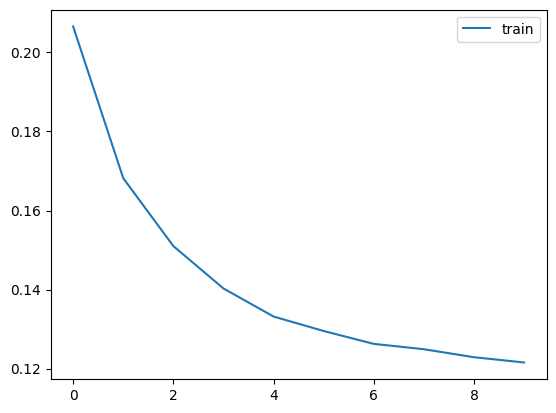

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='validation')
plt.legend()

plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin

class PretrainedEncoder(BaseEstimator, TransformerMixin): 
  #Using this class helps us create a custom transformer, using base estimator and transformer mixin as defaults for certain methods
    #We do this because we want to use the sklearn pipeline, but we need to give it a custom fit() function 
    #because we don't want it to get retrained when fitting our logistic regression!!!
    def __init__(self, encoder):
        self.encoder = encoder
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return self.encoder.predict(X)

# Create pipeline
ensemble = Pipeline([('encoder', PretrainedEncoder(encoder_model)), ('logistic', LogisticRegression())])

# Fit logistic regression to encoded data
ensemble.fit(X_train, y_train)

# Make predictions on test data
ensemble.predict(X_test)


NameError: ignored

In [ ]:
#Get encoded representation of data

#Train a logistic regression on the data with encoded representations as inputs, and outputs as 0 or 1 for the sample data

In [ ]:


lr = LinearRegression()
lr.fit(encoded_data, y_train)

In [ ]:
[128, 64, 32, 16][::-1]

[16, 32, 64, 128]

# Model Testing

In [ ]:
#Run the encoding on the test data and perform the same logistic regression model on the encoded data and see how our results are. Will want to check precision and recall probably
y_test = ?

In [ ]:
predictions = ensemble.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.5)
ax.scatter(range(len(y_test)), predictions, label='Predicted', alpha=0.5)
ax.set_xlabel('Sample')
ax.set_ylabel('Label')
ax.legend()
plt.show()